Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
-----套件載入完成-----
-----資料集讀取完成-----
訓練集維度:  (2160, 2)
測試集維度:  (720, 2)
驗證集維度:  (720, 2)
-----資料集分割完成-----
-----資料集另存完成-----
-----資料集整併完成-----
-----預訓練模型載入完成-----
-----觀察各資料集在雙向變換器的總長度-----
trainset size: 2160
valset size: 720
testset size:  720
-----觀察原文與經過雙向變換器轉換的tensor(張量)-----

original_statement:
全台專責加護病房 空床率不到3成
tokens:
['[CLS]', '全', '台', '專', '責', '加', '護', '病', '房', '空', '床', '率', '不', '到', '3', '成', '[SEP]']
label:0
------------------------------------------------
tokens_tensor: 
tensor([ 101, 1059, 1378, 2201, 6519, 1217, 6362, 4567, 2791, 4958, 2414, 4372,
         679, 1168,  124, 2768,  102])
segments_tensor: 
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
label_tensor:0

-----交叉比對完成------

tokens_tensors.shape=torch.Size([16, 67]) 
tens

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BERT模型的主架構

name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)
-----BERT模型的超參數-----
BertConfig {
  "_name_or_path": "bert-base-chinese",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "us

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

-----完成訓練與微調BERT模型-----
-----模型儲存完成(best_model_chinese.pth)-----
-----預測比對報告產出完成(prediction_report.xlsx)-----
-----混淆矩陣-----


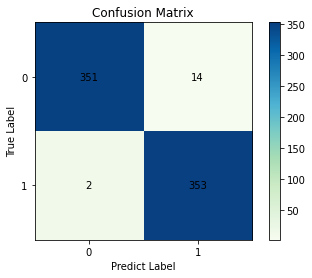

-----分類報告-----
              precision    recall  f1-score   support

           0     0.9616    0.9943    0.9777       353
           1     0.9944    0.9619    0.9778       367

    accuracy                         0.9778       720
   macro avg     0.9780    0.9781    0.9778       720
weighted avg     0.9783    0.9778    0.9778       720

-----找出分類錯誤的標籤-----


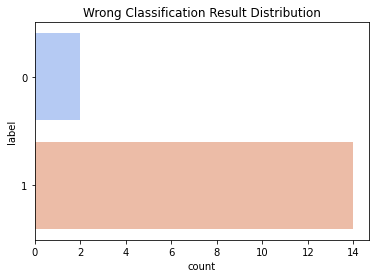

-----產出假新聞檢測成果報表-----


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
##訓練BERT模型##
#載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
from tqdm.notebook import tqdm
!pip install transformers
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
print("-----套件載入完成-----")
#讀取資料集
df=pd.read_csv('/content/drive/MyDrive/守燦_碩士論文實作/TFC/TFC_Preprocess.csv')
print("-----資料集讀取完成-----")
#分割資料集(訓練:60%、測試:20%、驗證20%)
train,validate,test=np.split(df.sample(frac=1),[int(.6*len(df)), int(.8*len(df))])
train_df=train.reset_index(drop=True)
val_df=validate.reset_index(drop=True)
test_df=test.reset_index(drop=True)
print('訓練集維度: ',train_df.shape)
print('測試集維度: ',val_df.shape)
print('驗證集維度: ',test_df.shape)
print("-----資料集分割完成-----")
#另存資料
train_df.to_csv('train.tsv',sep='\t',index=False)
val_df.to_csv('val.tsv',sep='\t',index=False)
test_df.to_csv('test.tsv',sep='\t',index=False)
print("-----資料集另存完成-----")
#整併資料
df=pd.concat([train_df,val_df,test_df])
print("-----資料集整併完成-----")
#載入預訓練模型
PRETRAINED_MODEL_NAME='bert-base-chinese'
tokenizer=BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)
print("-----預訓練模型載入完成-----")
#匯入資料至BERT預訓練模型當中
class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer #利用BERT標註器(BERT tokenizer)當作輸入
    #定義回傳一筆訓練/測試數據的函式
    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        #將tokens加入分離符號[CLS]與分隔符號[SEP]
        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)
        #將整個token序列轉換成index序列
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        #將語句包含[SEP]的token位置設為0
        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        return (tokens_tensor, segments_tensor, label_tensor)
    def __len__(self):
        return self.len
#初始化雙向變換器(Bidirectional Transformer)資料集
trainset=FakeNewsDataset('train',tokenizer=tokenizer)
valset=FakeNewsDataset('val',tokenizer=tokenizer)
testset=FakeNewsDataset('test',tokenizer=tokenizer)
print("-----觀察各資料集在雙向變換器的總長度-----")
print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())
print("-----觀察原文與經過雙向變換器轉換的tensor(張量)-----")
#選擇第五十五號樣本
sample_idx=55
#將token序列和index序列做比較
statement,label=trainset.df.iloc[sample_idx].values
#提取經雙向變換器轉換後的index tensor
tokens_tensor,segments_tensor,label_tensor=trainset[sample_idx]
#將tokens_tensor還原為token序列
tokens=tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text= " ".join(tokens)
#交叉比對雙向變換器運算前後的差異，並觀察輸出結果
print(f"""
original_statement:
{statement}
tokens:
{tokens}
label:{label}
------------------------------------------------
tokens_tensor: 
{tokens_tensor}
segments_tensor: 
{segments_tensor}
label_tensor:{label_tensor}
""")
print("-----交叉比對完成------")
#重新建構資料並擬和模型
#定義函式的輸入(samples)是一個list每個數值都是"FakeNewsDataset"回傳的一個樣本，每個樣本都包含3個tensor(tokens_tensor、segments_tensor、label_tensor)
def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    #測試集的labels
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    #針對tokens_tensor、segments_tensor執行zero padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)
    #建立attention masks，將tokens_tensors裡頭不為Zero Padding的位置設為1讓BERT只關注具有語義的tokens
    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    return tokens_tensors, segments_tensors, masks_tensors, label_ids
#初始化一個每次回傳16個訓練樣本
#將所有樣本的列表合併為一個mini-batch(最小批次運算量)
BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)
#觀察DataLoader當中所有tensor的元素與維度
data = next(iter(trainloader))
tokens_tensors,segments_tensors,masks_tensors,label_ids=data
print(f"""
tokens_tensors.shape={tokens_tensors.shape} 
{tokens_tensors}
------------------------
segments_tensors.shape={segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape={masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape={label_ids.shape}
{label_ids}
""")
print("-----擬和模型完成-----")
#建立BERT模型
PRETRAINED_MODEL_NAME = "bert-base-chinese" #預訓練模型
NUM_LABELS = 2 #判定標籤的數量(Fake/Real)
model = BertForSequenceClassification.from_pretrained(PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)
print("BERT模型的主架構")
print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))
print("-----BERT模型的超參數-----")
print(model.config)
print("-----確認電腦裝置-----")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)
print("-----確認電腦裝置完成-----")
print("-----開始訓練與微調BERT模型-----")
model.train()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-5) #優化器:Adam(learning_rate=1e-5)
NUM_EPOCHS=3
for epoch in range(NUM_EPOCHS):
    train_loss = 0.0 #初始化損失函數
    train_acc = 0.0 #初始化模型準確度
    loop = tqdm(trainloader)
    for batch_idx, data in enumerate(loop): #微調與訓練BERT模型
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]
        #將參數梯度歸零
        optimizer.zero_grad()
        #定義模型輸出格式
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)
        loss = outputs[0]
        loss.backward()
        optimizer.step()
        logits = outputs[1]
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist()) #將模型績效暫存至cpu
        # 紀錄當前batch loss
        train_loss += loss.item()
        # if batch_idx == len(trainloader)-1:
        #     _, acc = get_predictions(model, trainloader, compute_acc=True)
        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc = train_acc, loss = train_loss)
print("-----完成訓練與微調BERT模型-----")
#儲存訓練完成的模型
torch.save(model, './best_model_chinese.pth')
print('-----模型儲存完成(best_model_chinese.pth)-----')
#應用測試集真實值和模型預測值評估模型績效
true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]
        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors, 
                    token_type_ids=segments_tensors, 
                    attention_mask=masks_tensors)
        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)
        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())
#產出預測比對報告
df=pd.DataFrame({"predict_label": predictions})
df_test=pd.concat([testset.df.loc[:,['title']],testset.df.loc[:,['label']],df.loc[:,'predict_label']], axis=1)
test_report=df_test.to_excel("prediction_report.xlsx")
print("-----預測比對報告產出完成(prediction_report.xlsx)-----")
print("-----混淆矩陣-----")
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.GnBu)
    plt.colorbar()
    for x in range(len(confusion_mat)):
        for y in range(len(confusion_mat)):
            plt.annotate(confusion_mat[x, y], xy=(x, y),horizontalalignment='center',verticalalignment='center')
    plt.title('Confusion Matrix')    
    plt.ylabel('True Label')         
    plt.xlabel('Predict Label')     
    tick_marks = np.arange(2)
    plt.xticks(tick_marks,tick_marks)
    plt.yticks(tick_marks,tick_marks)
    plt.show()
confusion_mat=metrics.confusion_matrix(df_test.label, df_test.predict_label,labels=None,sample_weight=None)
plot_confusion_matrix(confusion_mat)
print("-----分類報告-----")
print(classification_report(df_test.label, df_test.predict_label,digits=4))
#找出分類錯誤的標籤並視覺化
print("-----找出分類錯誤的標籤-----")
wrong_df=df_test[df_test.label != df_test.predict_label]
sns.countplot(y="label",palette="coolwarm",data=wrong_df).set_title('Wrong Classification Result Distribution')
plt.show()
#找出假新聞文章
wrong_titles=df_test[df_test.label != df_test.predict_label].title.values
wrong_titles=pd.DataFrame(wrong_titles)
wrong_report=wrong_titles.to_excel("Chinese_WrongReport.xlsx")
print("-----產出假新聞檢測成果報表-----")

In [ ]:
##安裝ngrok##
!mkdir -p /drive
!mount --bind /content/drive/My\ Drive /drive
!mkdir -p /drive/ngrok-ssh
!mkdir -p ~/.ssh
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok
!/ngrok authtoken 2M7aDeYJUfPNfgauPkYPTQfbHNV_Ywo1nFTsjWHcEWeuhaWf
!pip install flask_ngrok==0.0.25

Mounted at /content/drive
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
mkdir: cannot create directory ‘/drive’: File exists
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/drive/ngrok-ssh
--2023-02-23 02:47:45--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 54.237.133.81, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1392

In [ ]:
##系統實作##
import flask
import torch
!pip install flasgger
from flasgger import Swagger
from transformers import BertTokenizer
#建立應用程式
app=flask.Flask(__name__)
app.config['SWAGGER']={
  'title':'繁體中文事實查核系統',
  'uiversion':3
}
swagger=Swagger(app)
#載入BERT模型
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=torch.load('best_model_chinese.pth', map_location=device)
model.eval()
#創建分詞器對象
tokenizer=BertTokenizer.from_pretrained('bert-base-chinese')
#定義API接口
@app.route('/Traditional-Chinese-Fact-Checking',methods=['GET']) 
def ChineseFactChecking():
  """ (新聞資料庫更新日期:2022/10/31)
  ---
  parameters:
    - name: input_text
      in: query
      type: string
      required: true
      description: "請輸入繁體中文新聞文字資訊"
  responses:
    200:
      description: "本系統為您傳輸的資訊完成事實查核!"
  """  
  #取得使用者輸入
  input_text=flask.request.args.get('input_text')
  #將輸入的字串轉換為一個張量
  input_ids=torch.tensor(tokenizer.encode(input_text)).unsqueeze(0).to(device)
  #指定張量的資料型態
  input_ids=input_ids.to(torch.int64)
  #使用BERT模型進行預測
  with torch.no_grad():
        outputs = model(input_ids)
        logits = outputs.logits
  probabilities=torch.softmax(logits,dim=-1).squeeze().tolist()
  #回傳預測結果
  return {"prediction":str(probabilities)}
if __name__=='__main__':
  app.run(debug='False',host='0.0.0.0',port=2023)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: ngrok: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
模型載入成功
 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://a0ba-34-124-241-42.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [23/Feb/2023 03:08:59] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Feb/2023 03:09:00] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Feb/2023 03:09:45] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Feb/2023 03:09:45] "GET /favicon.ico HTTP/1.1" 404 -
